In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sys, imageio, os
sys.path.append("/Users/kai/Downloads/graduation/code")
from models.model import *
from models.data_prepare import *
import keras
sys.path.append("/Users/kai/Downloads/graduation/AMFtrack")
from amftrack.util.sys import storage_path
from amftrack.util.geometry import generate_index_along_sequence
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    compute_edge_width_profile,
    extract_section_profiles_for_edge,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    Node,
    Edge,
)
from amftrack.util.sys import get_current_folders, update_plate_info, test_path
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
)

2023-02-10 14:47:38.384870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 14:47:38.534168: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-10 14:47:38.534185: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-10 14:47:53.019936: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

ModuleNotFoundError: No module named 'models'

In [2]:
model_name = "test"
directory = storage_path+"/"
plate_name = "20221116_0311"

In [3]:
update_plate_info(directory)
folder_df = get_current_folders(directory)
select = folder_df[folder_df["Plate"] == "705"]
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

analysed:   0%|          | 0/44 [00:00<?, ?it/s]

2022-11-16 03:11:00


In [4]:
width_fun = lambda edge: compute_edge_width_profile(
    exp, 0, edge, resolution=4, offset=5, target_length=100
)
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=4, step=3
)

In [5]:
def f_w(edge):
    if edge in medians:
        return medians[edge]
    else:
        return 0.0

In [6]:
edges = get_all_edges(exp, 0)
medians = {}
mean = {}
for edge in edges:
    if len(edge.pixel_list(0)) > 100:
        widths = width_fun(edge)
        medians[edge] = np.median(widths)

2022-12-15 10:48:03.539210: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


KeyboardInterrupt: 

KeyboardInterrupt: 

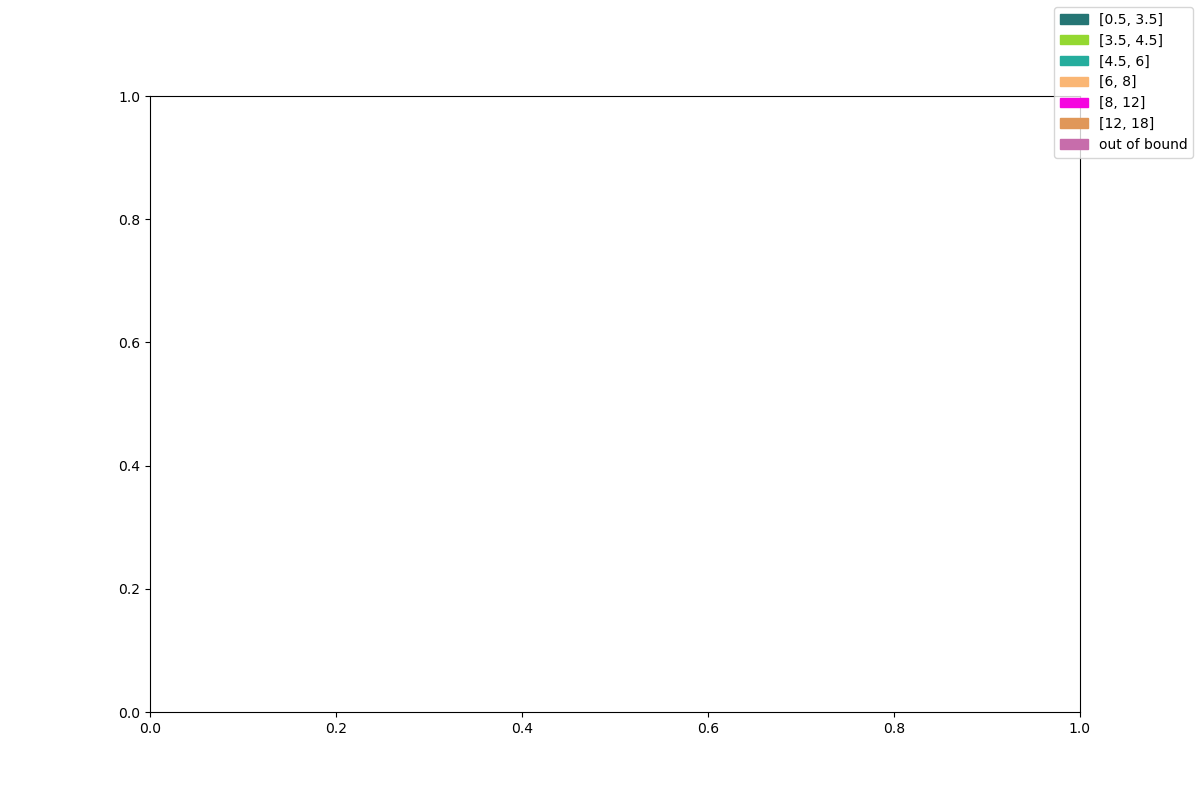

In [145]:
%matplotlib widget
bins = [[0.5, 3.5], [3.5, 4.5], [4.5, 6], [6, 8], [8, 12],[12, 18]]
plot_edge_width(exp, 0, width_fun=f_w, intervals=bins, dilation=20, color_seed=100)
plt.title("BO full plate for 20221116_0311.png")
plt.savefig("plot_data/full plate/BO full plate for 20221116_0311.png")

In [ ]:
%matplotlib widget
hist = []
for key,value in medians.items():
    hist.append(value)
plt.hist(hist)
plt.xlabel("width ($\mu m$)")
plt.ylabel("frequency")
plt.title("BO width distribution for plate 20221116_0311")
plt.savefig("plot_data/width distribution/BO width distribution for plate 20221116_0311.png")
plt.show()

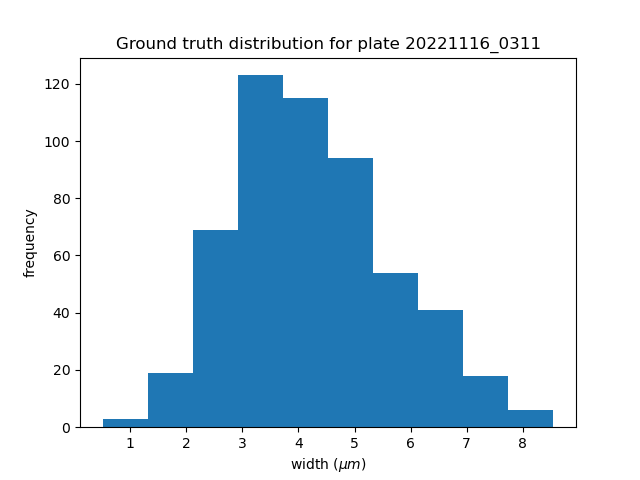

In [23]:
X, y = data("vary_width")
%matplotlib widget
plt.hist(y)
plt.xlabel("width ($\mu m$)")
plt.ylabel("frequency")
plt.title("Ground truth distribution for plate 20221116_0311")
plt.savefig("plot_data/data extract/Ground truth distribution for plate 20221116_0311.png")

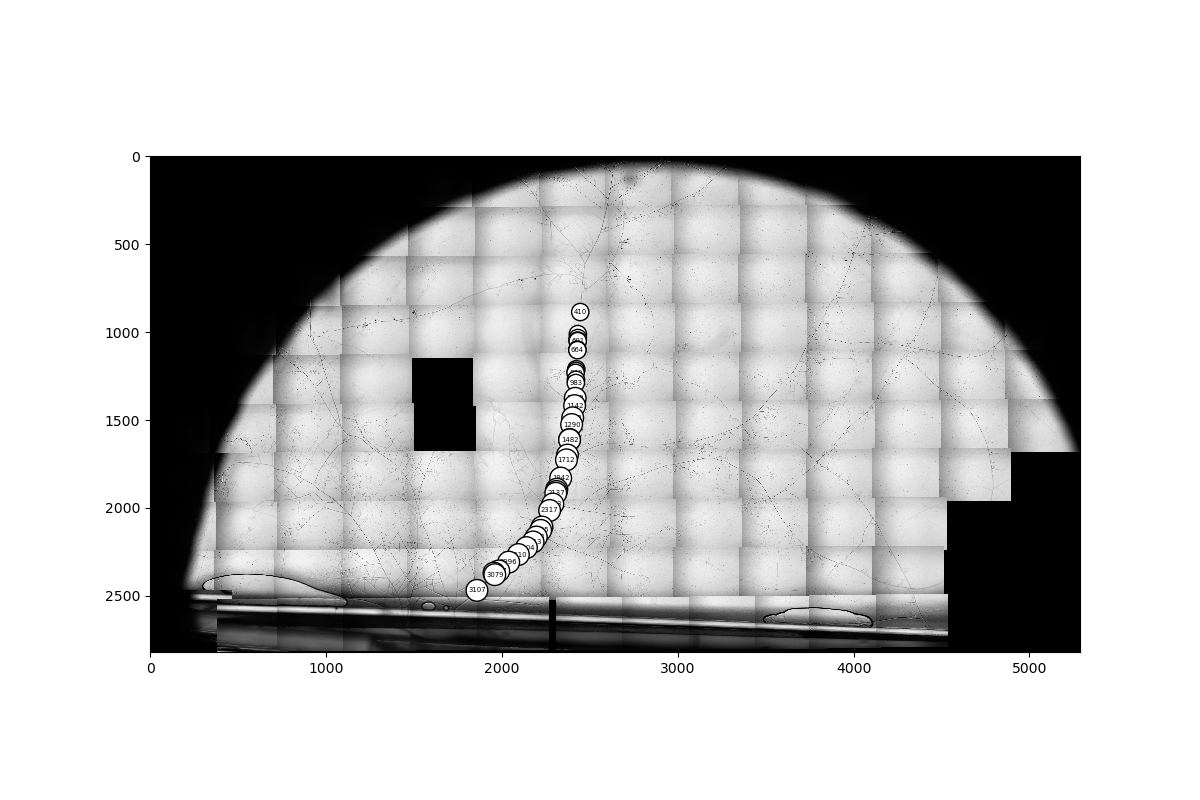

In [148]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
for path in sorted(nx.shortest_path(G, 410, 3107)): # main hypha 1
    node_label.append(path)
    nodes.append(Node(path,exp))
# for path in sorted(nx.shortest_path(G, 3022, 681)): # main hypha 2
#     node_label.append(path)
#     nodes.append(Node(path,exp))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
)

In [150]:
# edge check for pos 1-27
edges = []
for i in range(len(nodes)-1):
    edge = get_edge_from_node_labels(exp, 0, node_label[i],node_label[i+1])
    edges.append(edge)
edges = list(filter(None, edges))
edges

[Edge(556,410),
 Edge(556,583),
 Edge(598,583),
 Edge(601,598),
 Edge(601,662),
 Edge(662,664),
 Edge(793,664),
 Edge(814,793),
 Edge(840,814),
 Edge(840,932),
 Edge(932,983),
 Edge(983,1099),
 Edge(1142,1099),
 Edge(1142,1228),
 Edge(1290,1228),
 Edge(1476,1290),
 Edge(1482,1476),
 Edge(1661,1482),
 Edge(1712,1661),
 Edge(1942,1712),
 Edge(2091,1942),
 Edge(2091,2113),
 Edge(2137,2113),
 Edge(2253,2137),
 Edge(2317,2253),
 Edge(2460,2317),
 Edge(2460,2535),
 Edge(2643,2535),
 Edge(2713,2643),
 Edge(2804,2713),
 Edge(2910,2804),
 Edge(2996,2910),
 Edge(3057,2996),
 Edge(3070,3057),
 Edge(3079,3070),
 Edge(3107,3079)]

In [152]:
medians = {}
for edge in edges:
    if len(edge.pixel_list(0)) > 100:
        widths = width_fun(edge)
        medians[edge] = np.median(widths)
medians

{Edge(556,410): 4.7356324,
 Edge(556,583): 5.010211,
 Edge(598,583): 5.114189,
 Edge(601,662): 5.1036606,
 Edge(793,664): 5.6113696,
 Edge(814,793): 5.9977484,
 Edge(840,814): 6.9686313,
 Edge(840,932): 6.7714057,
 Edge(932,983): 6.684911,
 Edge(983,1099): 6.9548316,
 Edge(1142,1099): 6.7235703,
 Edge(1142,1228): 6.40767,
 Edge(1290,1228): 6.6628942,
 Edge(1476,1290): 6.6326995,
 Edge(1661,1482): 6.1922855,
 Edge(1712,1661): 6.5760837,
 Edge(1942,1712): 7.2408004,
 Edge(2091,1942): 7.340013,
 Edge(2091,2113): 6.802715,
 Edge(2137,2113): 6.6055384,
 Edge(2253,2137): 6.089491,
 Edge(2317,2253): 6.1448803,
 Edge(2460,2317): 8.056402,
 Edge(2460,2535): 5.60444,
 Edge(2643,2535): 5.665937,
 Edge(2713,2643): 5.614668,
 Edge(2804,2713): 5.4678555,
 Edge(2910,2804): 6.7329893,
 Edge(2996,2910): 7.055601,
 Edge(3057,2996): 6.960517,
 Edge(3070,3057): 4.592496,
 Edge(3079,3070): 5.5827975,
 Edge(3107,3079): 6.312767}

[4.7356324, 5.010211, 5.114189, 5.1036606, 5.6113696, 5.9977484, 6.9686313, 6.7714057, 6.684911, 6.9548316, 6.7235703, 6.40767, 6.6628942, 6.6326995, 6.1922855, 6.5760837, 7.2408004, 7.340013, 6.802715, 6.6055384, 6.089491, 6.1448803, 8.056402, 5.60444, 5.665937, 5.614668, 5.4678555, 6.7329893, 7.055601, 6.960517, 4.592496, 5.5827975, 6.312767]
['556', '556', '598', '601', '793', '814', '840', '840', '932', '983', '1142', '1142', '1290', '1476', '1661', '1712', '1942', '2091', '2091', '2137', '2253', '2317', '2460', '2460', '2643', '2713', '2804', '2910', '2996', '3057', '3070', '3079', '3107']


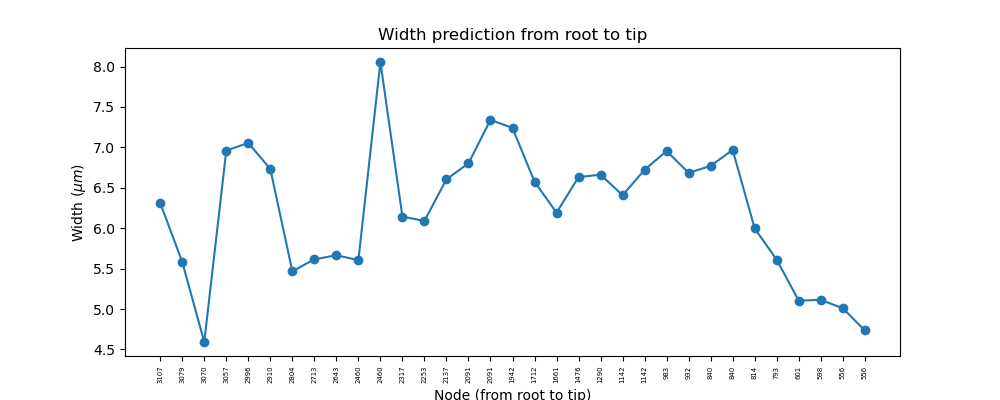

In [153]:
%matplotlib widget
plt.figure(figsize=(10, 4))
width = []
width_node=[]
for key, value in medians.items():
    width.append(value)
    width_node.append(str(key).replace("Node(","").replace(")","").replace("(","").split(",")[0])
width.reverse()
width_node.reverse()
plt.plot(width,"o-")
plt.xticks(np.arange(0,len(width_node),1),width_node,rotation = 90,fontsize=5)
plt.xlabel("Node (from root to tip)",fontsize=10)
plt.ylabel("Width ($\mu m$)",fontsize=10)
plt.title("Width prediction from root to tip")
# plt.show()
plt.savefig("plot_data/murray's rule/main hypha 1 width from prediction.png")

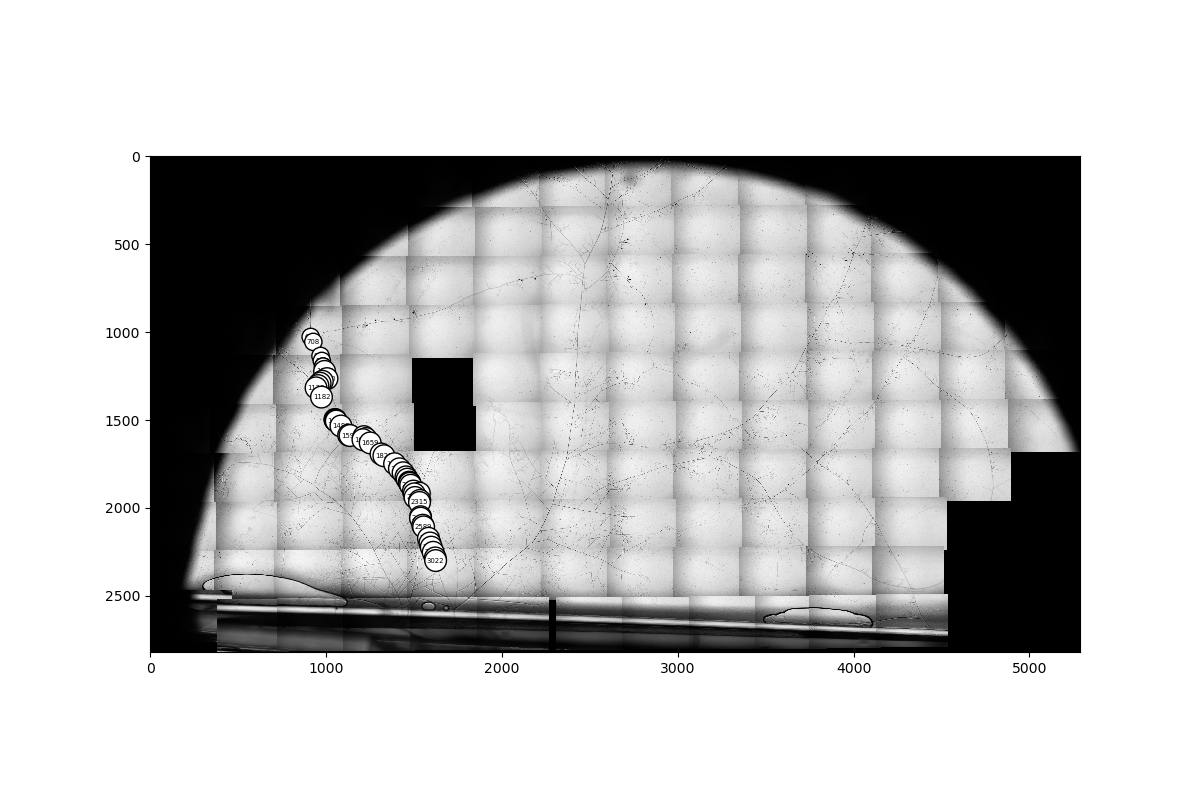

In [157]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
for path in sorted(nx.shortest_path(G, 3022, 681)): # main hypha 2
    node_label.append(path)
    nodes.append(Node(path,exp))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
)

In [160]:
# edge check for pos 28-60
edges = []
for i in range(len(nodes)-1):
    edge = get_edge_from_node_labels(exp, 0, node_label[i],node_label[i+1])
    edges.append(edge)
edges = list(filter(None, edges))

In [163]:
medians = {}
for edge in edges:
    if len(edge.pixel_list(0)) > 100:
        widths = width_fun(edge)
        medians[edge] = np.median(widths)
medians

{Edge(681,708): 6.963436,
 Edge(708,819): 6.546746,
 Edge(819,884): 5.677479,
 Edge(884,965): 5.2902327,
 Edge(967,1020): 5.4519434,
 Edge(1020,1070): 5.387514,
 Edge(1086,1070): 4.5944967,
 Edge(1102,1086): 4.45946,
 Edge(1113,1102): 5.3261104,
 Edge(1120,1113): 4.937664,
 Edge(1120,1182): 4.4449253,
 Edge(1182,1400): 4.8337746,
 Edge(1429,1483): 3.680899,
 Edge(1483,1591): 4.8436494,
 Edge(1598,1618): 4.910184,
 Edge(1659,1801): 4.7683625,
 Edge(1801,1825): 4.9814434,
 Edge(1825,1895): 5.0970836,
 Edge(1895,1954): 4.8205256,
 Edge(1954,1999): 4.4402027,
 Edge(1999,2042): 4.361889,
 Edge(2080,2042): 4.391823,
 Edge(2080,2108): 4.8188143,
 Edge(2147,2120): 5.0081725,
 Edge(2147,2207): 4.54718,
 Edge(2270,2232): 3.4662857,
 Edge(2315,2292): 2.8817272,
 Edge(2315,2431): 3.1716976,
 Edge(2442,2566): 3.828601,
 Edge(2566,2589): 3.983409,
 Edge(2589,2756): 4.491488,
 Edge(2813,2756): 4.292626,
 Edge(2813,2872): 4.3654532,
 Edge(2872,2933): 5.0005584,
 Edge(2933,2998): 5.8689213,
 Edge(3022,

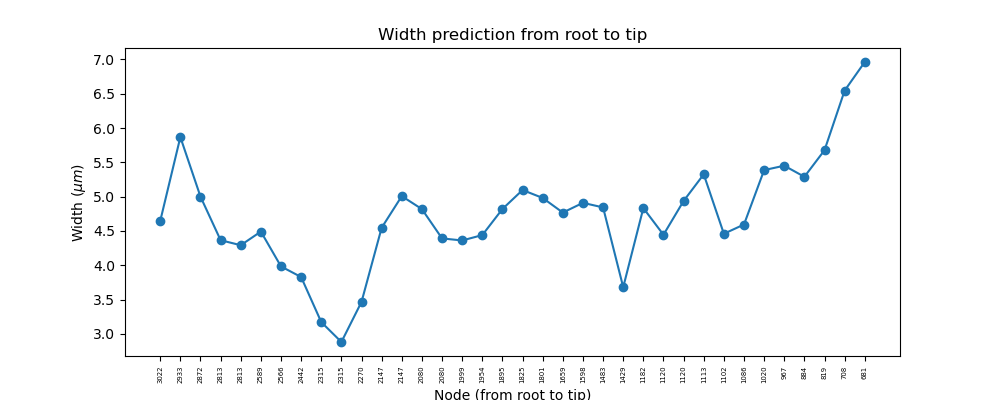

In [165]:
%matplotlib widget
plt.figure(figsize=(10, 4))
width = []
width_node=[]
for key, value in medians.items():
    width.append(value)
    width_node.append(str(key).replace("Node(","").replace(")","").replace("(","").split(",")[0])
width.reverse()
width_node.reverse()
plt.plot(width,"o-")
plt.xticks(np.arange(0,len(width_node),1),width_node,rotation = 90,fontsize=5)
plt.xlabel("Node (from root to tip)",fontsize=10)
plt.ylabel("Width ($\mu m$)",fontsize=10)
plt.title("Width prediction from root to tip")
plt.savefig("plot_data/murray's rule/main hypha 2 width from prediction.png")